(2000, 2000, 3)
hey (2000, 2000, 3)


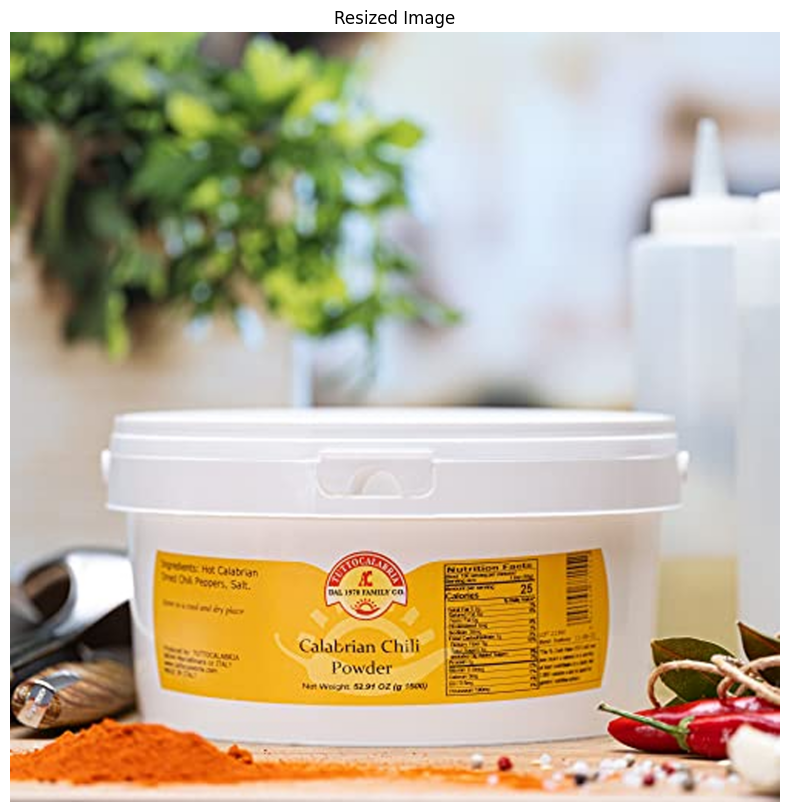

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def resize_image(image, scale_percent):
    """
    Resize the image while attempting to preserve text features.
    
    Parameters:
        image (np.ndarray): Input image.
        scale_percent (float): Scale percentage to resize the image.
    
    Returns:
        np.ndarray: Resized image.
    """
    # Get the original dimensions
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dimensions = (width, height)

    # Resize the image using interpolation
    resized_image = cv2.resize(image, dimensions, interpolation=cv2.INTER_CUBIC)
    print(resized_image.shape)
    
    return resized_image

def display_image(image, title="Image"):
    """
    Display an image using matplotlib.
    
    Parameters:
        image (np.ndarray): Image to be displayed.
        title (str): Title of the image.
    """
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    print("hey", image_rgb.shape)
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

def save_image(image, output_path):
    """
    Save the image to the specified file path.
    
    Parameters:
        image (np.ndarray): Image to be saved.
        output_path (str): Path to save the image.
    """
    if image is None:
        raise ValueError("Image not loaded. Check the image processing steps.")
    
    # Save the image to disk
    success = cv2.imwrite(output_path, image)
    if not success:
        raise IOError(f"Failed to save the image to {output_path}")

def main(image_path, scale_percent):
    # Load the image
    image = cv2.imread(image_path)
    
    # Resize the image
    resized_image = resize_image(image, scale_percent)
    save_image(resized_image, "resized-output.jpg")
    
    # Display the resized image
    display_image(resized_image, title="Resized Image")

# Path to your image file
image_path = r'D:\Programs\DataScience\AmazonML\images\sample\41ADVPQgZOL.jpg'
scale_percent = 400  # Increase size by 150%
main(image_path, scale_percent)
